In [8]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'Attribute1': [10, 7, 5, 8, 9],
        'Attribute2': [0.1, 0.4, 0.3, 0.2, 0.5]}
df = pd.DataFrame(data)

# Define criteria for maximizing or minimizing each attribute
maximize_criteria = [True, False]  # True for maximizing, False for minimizing

# Define weights for each attribute (you can adjust these weights)
weights = [0.6, 0.4]

# Normalize the DataFrame
normalized_df = (df - df.min()) / (df.max() - df.min())

print(df)
print(normalized_df)


   Attribute1  Attribute2
0          10         0.1
1           7         0.4
2           5         0.3
3           8         0.2
4           9         0.5
   Attribute1  Attribute2
0         1.0        0.00
1         0.4        0.75
2         0.0        0.50
3         0.6        0.25
4         0.8        1.00


In [9]:
# Calculate the weighted normalized DataFrame
weighted_normalized_df = normalized_df * weights

# Calculate the ideal and anti-ideal solutions based on criteria
ideal_solution = weighted_normalized_df.max()
anti_ideal_solution = weighted_normalized_df.min()

# Calculate the Euclidean distances to ideal and anti-ideal solutions
distance_to_ideal = np.sqrt(((weighted_normalized_df - ideal_solution) ** 2).sum(axis=1))
distance_to_anti_ideal = np.sqrt(((weighted_normalized_df - anti_ideal_solution) ** 2).sum(axis=1))

print(weighted_normalized_df)
print(distance_to_ideal)
print(distance_to_anti_ideal)


   Attribute1  Attribute2
0        0.60         0.0
1        0.24         0.3
2        0.00         0.2
3        0.36         0.1
4        0.48         0.4
0    0.400000
1    0.373631
2    0.632456
3    0.384187
4    0.120000
dtype: float64
0    0.600000
1    0.384187
2    0.200000
3    0.373631
4    0.624820
dtype: float64


In [10]:
# Calculate the TOPSIS score (closeness to the ideal solution)
topsis_score = distance_to_anti_ideal / (distance_to_ideal + distance_to_anti_ideal)

# Add the TOPSIS score as a new column to the original DataFrame
df['TOPSIS Score'] = topsis_score

# Rank the alternatives based on the TOPSIS score
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)

# Display the resulting DataFrame
print(df)

   Attribute1  Attribute2  TOPSIS Score  Rank
0          10         0.1      0.600000   2.0
1           7         0.4      0.506965   3.0
2           5         0.3      0.240253   5.0
3           8         0.2      0.493035   4.0
4           9         0.5      0.838887   1.0


In [ ]:
# Arguments are dataset, number of columns, and weights of each column 
def Normalize(dataset, nCol, weights):
    for i in range(1, nCol):
        temp = 0
        # Calculating Root of Sum of squares of a particular column
        for j in range(len(dataset)):
            temp = temp + dataset.iloc[j, i]**2
        temp = temp**0.5
        # Weighted Normalizing a element
        for j in range(len(dataset)):
            dataset.iat[j, i] = (dataset.iloc[j, i] / temp)*weights[i-1]
    print(dataset)

In [2]:
import pandas as pd

# Sample DataFrame df1 (replace this with your actual DataFrame)
data = {'sale_date': ['2022-01-01', '2022-01-01', '2022-01-02'],
        'product_code': ['A', 'B', 'A'],
        'volume': [10, 15, 20],
        'unit_price': [5, 7, 6],
        'sweep_sales_time': ['morning', 'afternoon', 'morning']}
df1 = pd.DataFrame(data)
df1

,sale_date,product_code,volume,unit_price,sweep_sales_time
0,2022-01-01,A,10,5,morning
1,2022-01-01,B,15,7,afternoon
2,2022-01-02,A,20,6,morning


In [4]:

# Create total_sales and revenue DataFrames
date_unique = df1['sale_date'].unique()
product_unique = df1['product_code'].unique()
total_sales = pd.DataFrame(0, index=date_unique, columns=product_unique)
revenue = pd.DataFrame(0, index=date_unique, columns=product_unique)

print(date_unique)
print(product_unique)
total_sales

['2022-01-01' '2022-01-02']
['A' 'B']


,A,B
2022-01-01,0,0
2022-01-02,0,0


In [9]:
df1

,sale_date,product_code,volume,unit_price,sweep_sales_time
0,2022-01-01,A,10,5,morning
1,2022-01-01,B,15,7,afternoon
2,2022-01-02,A,20,6,morning


In [8]:
# Iterate through df1 rows
for index, row in df1.iterrows():
    date = row['sale_date']
    kind = row['product_code']
    volume = row['volume']
    unit_price = row['unit_price']
    sweep_sales_time = row['sweep_sales_time']
    print(row)
    print('\n')
    
    print(date)
    print('\n')
    
    # Calculate total_sales and revenue
    total_sales.at[date, kind] += volume
    revenue.at[date, kind] += volume * unit_price

# Print the updated DataFrames
print("Total Sales:")
print(total_sales)

print("\nRevenue:")
print(revenue)

sale_date           2022-01-01
product_code                 A
volume                      10
unit_price                   5
sweep_sales_time       morning
Name: 0, dtype: object


2022-01-01


sale_date           2022-01-01
product_code                 B
volume                      15
unit_price                   7
sweep_sales_time     afternoon
Name: 1, dtype: object


2022-01-01


sale_date           2022-01-02
product_code                 A
volume                      20
unit_price                   6
sweep_sales_time       morning
Name: 2, dtype: object


2022-01-02


Total Sales:
             A   B
2022-01-01  30  45
2022-01-02  60   0

Revenue:
              A    B
2022-01-01  150  315
2022-01-02  360    0


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 3, 4, 5, 6],
    'C': [3, 4, 5, 6, 7]
}

df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,2,3,4
2,3,4,5
3,4,5,6
4,5,6,7


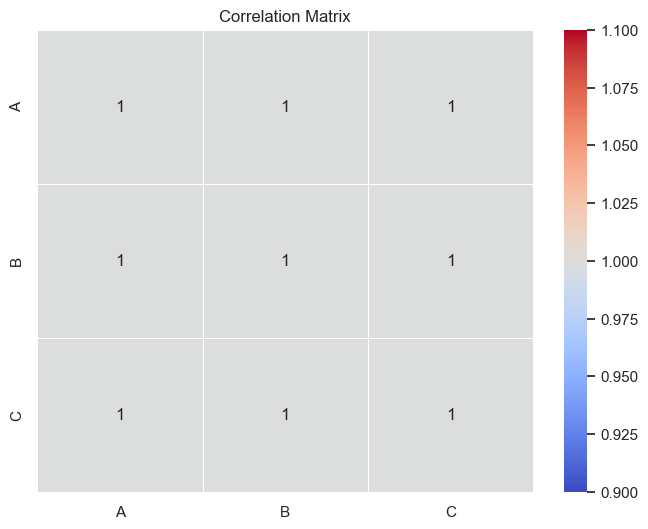

In [11]:
correlation_matrix = df.corr()
# Set the style for the plot (optional)
sns.set(style="white")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


In [17]:
# Initialize an empty list
my_array = []

# Loop through numbers 1 to 6 and store them in the first five positions of the array
for i in range(1, 7):
    if i <= 5:
        my_array.append(i)
    else:
        break

# Print the array
print(my_array)


[1, 2, 3, 4, 5]


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot
print(sm.datasets.sunspots.NOTE)
dta = sm.datasets.sunspots.load_pandas().data
dta
# sm.tsa.datetools.dates_from_range("1700", "2008")
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]
dta
dta.plot(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()


1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data with dates
data = {
    'Date': pd.date_range(start='2023-01-01', periods=5, freq='M'),
    'Value1': [10, 20, 15, 30, 25],
    'Value2': [5, 15, 10, 20, 10],
    'Value3': [15, 25, 20, 35, 30]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the total value for each date
df['Total'] = df[['Value1', 'Value2', 'Value3']].sum(axis=1)

print(df)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars
bottom = None
for col in ['Value1', 'Value2', 'Value3']:
    ax.bar(df['Date'], df[col], label=col, bottom=bottom)
    # print(df[col])
    if bottom is None:
        bottom = df[col]
    else:
        bottom += df[col]
    # print(bottom)

# Plot a curve above the stacked bars (e.g., a line chart)
ax.plot(df['Date'], df['Total'], color='black', marker='o', label='Total')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Show the plot
plt.title('Stacked Bar Plot with Curve')
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd

# Sample DataFrame
data = {
    'Date': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'Value1': [10, 20, 15, 30, 25],
    'Value2': [5, 15, 10, 20, 10],
    'Value3': [15, 25, 20, 35, 30],
    'Value4': [8, 18, 13, 28, 23],
    'Value5': [12, 22, 17, 32, 27]
}

df = pd.DataFrame(data)

# Calculate the sum of columns 1 to 5
df['Sum_1_to_5'] = df.iloc[:, 1:6].sum(axis=1)

# Display the DataFrame with the new column
print(df)
print(df.columns)

In [ ]:
# import numpy as np
# import pandas as pd
# from datetime import datetime
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# # !pip install pmdarima --quiet
# import pmdarima as pm
# import matplotlib.pylab as plt
# from matplotlib import pyplot
# %matplotlib inline
# from matplotlib.pylab import rcParams

# df = pd.read_excel("tota_category_sale.xlsx",index_col=0) # 注意读取的时候读取'蔬菜品类日销量.xlsx'
# name=['花叶类','花菜类','水生根茎类','茄类','辣椒类','食用菌']

# # 直方图
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# axes = axes.flatten()

# for i, col in enumerate(range(6)):  # Loop from 0 to 5
#     ax = axes[i]
#     ax.hist(df[col], bins=60)  # Adjust the number of bins as needed
#     ax.set_xlabel('销量')
#     ax.set_ylabel('频率')
#     ax.set_title(f'{name[i]}-直方图')

# plt.tight_layout()
# plt.savefig(f'蔬菜品种直方图.png')
# plt.show()

# # 概率图
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# axes = axes.flatten()

# for i, col in enumerate(range(6)):  # Loop from 0 to 5
#     ax = axes[i]
#     sns.kdeplot(df[col], ax=ax, fill=True)  # Use sns.kdeplot for density plot
#     ax.set_xlabel('销量')
#     ax.set_ylabel('概率密度')
#     ax.set_title(f'{name[i]}-概率分布')

# plt.tight_layout()
# plt.savefig(f'蔬菜品种概率分布.png')
# plt.show()

# # 曲线图
# plt.figure(figsize=(16, 7))  # Set the figure size
# for col in df.columns:
#     plt.plot(df.index, df[col], label=f'{name[col]}')

# plt.xlabel('日期')
# plt.ylabel('销量')
# plt.legend()

# plt.title('各类蔬菜日销量变化')
# plt.savefig(f'各类蔬菜日销量变化.png')
# plt.show()

# # 曲线图-各单品
# for i, col in enumerate(range(6)):
#     plt.figure(figsize=(12, 8))  # Set the figure size for each plot
#     plt.plot(df.index, df[col])
#     plt.xlabel('日期')
#     plt.ylabel('销量')
#     plt.title(f'2020-2023{name[i]}类蔬菜日销量')
#     plt.savefig(f'{name[i]}类日销量.png')
#     plt.close()

# print("Plots saved as separate image files.")

## 时间序列分解
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
# axes = axes.flatten()

# column_names = [0, 1, 2, 3, 4, 5]

# for i, col in enumerate(column_names):
#     ax = axes[i]
#     decompose_result = seasonal_decompose(df[col], model='additive', period=1)
    
#     ax.plot(decompose_result.trend, label='Trend')
#     ax.plot(decompose_result.seasonal, label='Seasonal')
#     ax.plot(decompose_result.resid, label='Residual')
    
#     ax.set_xlabel('日期')
#     ax.set_ylabel('销量')
#     ax.set_title(f'{name[col]}时间序列分解')
#     ax.legend()

# plt.tight_layout()
# plt.savefig(f'各类蔬菜数据时间序列分解.png')
# plt.show()

# # 检查品种日销量是否符合正态分布
# from scipy.stats import shapiro
# for col in df.columns:
#     stat, p = shapiro(df[col])
#     if p > 0.05:
#         print("Data looks normally distributed (p-value =", p, ")")
#     else:
#         print("Data does not look normally distributed (p-value =", p, ")")

# # 检查时间序列数据是否静止
# n_adf = ndiffs(df[0], test='adf')  # -> 0
# for col in df.columns:
#     n_adf = ndiffs(df[col], test='adf')  # -> 0
#     if n_adf == 1:
#         print(n_adf)

# # 自动寻找最优参数
# for col in df.columns:
#     ARIMA_model = pm.auto_arima(df[col], 
#                           start_p=1, 
#                           start_q=1,
#                           test='adf', # use adftest to find optimal 'd'
#                           max_p=6, max_q=6, # maximum p and q
#                           m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
#                           d=None,# let model determine 'd'
#                           seasonal=False, # No Seasonality for standard ARIMA
#                           trace=False, #logs 
#                           error_action='warn', #shows errors ('ignore' silences these)
#                           suppress_warnings=True,
#                           stepwise=True)
#     ARIMA_model.plot_diagnostics(figsize=(15,12))
#     print(ARIMA_model.summary().tables[0].data[1][1])
#     plt.show()
#     print(ARIMA_model.summary().tables[0].data)